C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\3259841658.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\3259841658.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CSIRO Adjusted Sea Level'] = pd.to_numeric(df_cleaned['CSIRO Adjusted Sea Level'], errors='coerce')


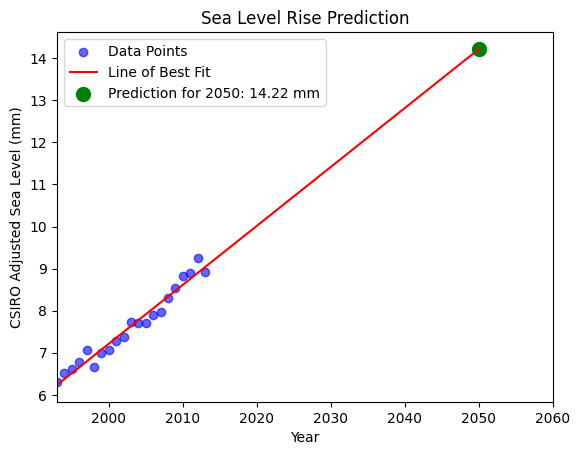

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

df = pd.read_excel('D:/sea-level-predictor.XLSX', header=0)

# Removing rows with NaN in 'CSIRO Adjusted Sea Level'
df_filtered_clean = df_filtered.dropna(subset=['CSIRO Adjusted Sea Level'])

# fitting the model using the cleaned data
X = df_filtered_clean['Year'].values.reshape(-1, 1)
y = df_filtered_clean['CSIRO Adjusted Sea Level'].values

# Creating and fitting the model
model = LinearRegression()
model.fit(X, y)

df_cleaned = df.dropna()
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')
df_cleaned['CSIRO Adjusted Sea Level'] = pd.to_numeric(df_cleaned['CSIRO Adjusted Sea Level'], errors='coerce')
df_cleaned = df_cleaned.dropna()

# Extracting years and sea levels
years = df_cleaned['Year']
sea_level = df_cleaned['CSIRO Adjusted Sea Level']

# Performing regression
slope, intercept, r_value, p_value, std_err = linregress(years, sea_level)

# Checking regression output
if np.isnan(slope) or np.isnan(intercept):
    print("Regression failed. Check your data for invalid entries.")
else:
    # Predicting sea level for 2050
    year_2050 = 2050
    sea_level_2050 = slope * year_2050 + intercept

    # Extending years for the line of best fit
    extended_years = np.arange(min(years), 2051)
    best_fit_line = slope * extended_years + intercept

    # Plotting data points
    plt.scatter(years, sea_level, label='Data Points', color='blue', alpha=0.6)

    # Plotting line of best fit
    plt.plot(extended_years, best_fit_line, label='Line of Best Fit', color='red')

    # Highlighting prediction for 2050
    plt.scatter(year_2050, sea_level_2050, color='green', s=100, label=f'Prediction for 2050: {sea_level_2050:.2f} mm')

    # Setting x-axis limits
    plt.xlim(min(years), 2060)

    # Adding labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('CSIRO Adjusted Sea Level (mm)')
    plt.title('Sea Level Rise Prediction')
    plt.legend()

#Show plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\942170434.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['CSIRO Adjusted Sea Level'].fillna(df_filtered['CSIRO Adjusted Sea Level'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\942170434.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[

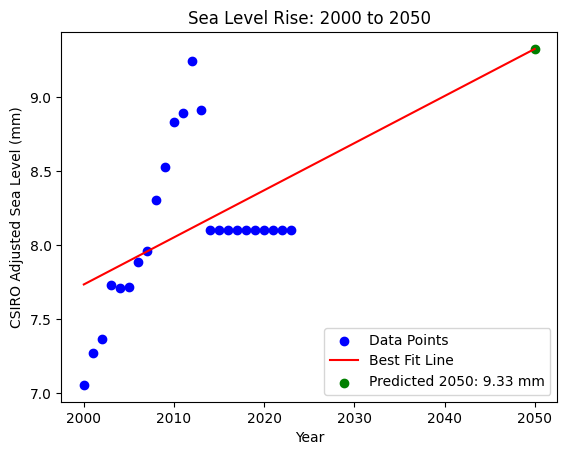

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_excel('D:/sea-level-predictor.XLSX', header=0)

# Filtering the data to include years 2000 to the most recent year
df_filtered = df[df['Year'] >= 2000]

# Imputting NaN values with the mean of the 'CSIRO Adjusted Sea Level' column
df_filtered['CSIRO Adjusted Sea Level'].fillna(df_filtered['CSIRO Adjusted Sea Level'].mean(), inplace=True)

# Linear regression (Best fit line)
X = df_filtered['Year'].values.reshape(-1, 1)
y = df_filtered['CSIRO Adjusted Sea Level'].values

# Creation and fitting the model
model = LinearRegression()
model.fit(X, y)

# Predicting values for the years 2000 to 2050
years_extended = np.arange(2000, 2051).reshape(-1, 1)
predicted_sea_levels = model.predict(years_extended)

# Plotting the data points and best fit line
plt.scatter(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level'], color='blue', label='Data Points')
plt.plot(years_extended, predicted_sea_levels, color='red', label='Best Fit Line')

# The predicted sea level for 2050
predicted_2050 = model.predict([[2050]])[0]
plt.scatter(2050, predicted_2050, color='green', label=f'Predicted 2050: {predicted_2050:.2f} mm')

#labels and legend
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.title('Sea Level Rise: 2000 to 2050')
plt.legend()

# plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\1259236507.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['CSIRO Adjusted Sea Level'].fillna(df_filtered['CSIRO Adjusted Sea Level'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10704\1259236507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtere

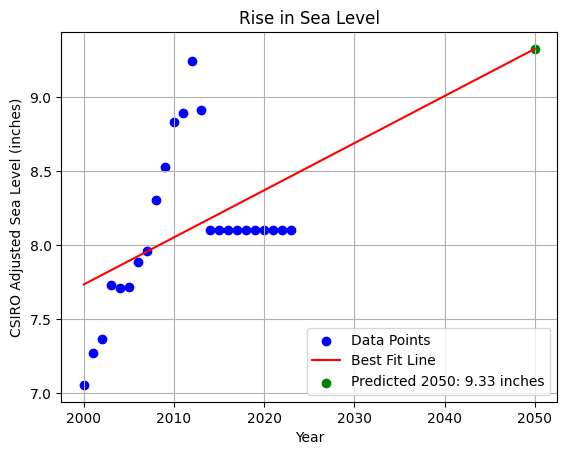

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_excel('D:/sea-level-predictor.XLSX', header=0)

# Filtering the data to include years 2000 to the most recent year
df_filtered = df[df['Year'] >= 2000]

# Imputting NaN values with the mean of the 'CSIRO Adjusted Sea Level' column
df_filtered['CSIRO Adjusted Sea Level'].fillna(df_filtered['CSIRO Adjusted Sea Level'].mean(), inplace=True)

# Linear regression (Best fit line)
X = df_filtered['Year'].values.reshape(-1, 1)  # Feature (year)
y = df_filtered['CSIRO Adjusted Sea Level'].values  # Target (sea level)

# Creation and fitting the model
model = LinearRegression()
model.fit(X, y)

# Predicting values for the years 2000 to 2050
years_extended = np.arange(2000, 2051).reshape(-1, 1)
predicted_sea_levels = model.predict(years_extended)

# Plotting the data points and best fit line
plt.scatter(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level'], color='blue', label='Data Points')
plt.plot(years_extended, predicted_sea_levels, color='red', label='Best Fit Line')

# The predicted sea level for 2050
predicted_2050 = model.predict([[2050]])[0]

plt.scatter(2050, predicted_2050, color='green', label=f'Predicted 2050: {predicted_2050:.2f} inches')

# labels and legend with the required updates
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

plt.grid(True)
